In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree    
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier

In [4]:
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate

In [5]:
train = pd.read_csv('Train_data.csv')

In [6]:
train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [7]:
test = pd.read_csv('Test_data.csv')

In [8]:
test.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71
5,0,tcp,http,SF,267,14515,0,0,0,0,...,155,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,255,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02
8,0,tcp,http,SF,327,467,0,0,0,0,...,151,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,52,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [10]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [12]:
train.shape

(25192, 42)

In [13]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [14]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count}({round(per, 3)}%)")

In [15]:
print(f"Number of duplicated rows: {train.duplicated().sum()}")

Number of duplicated rows: 0


<Axes: xlabel='class', ylabel='count'>

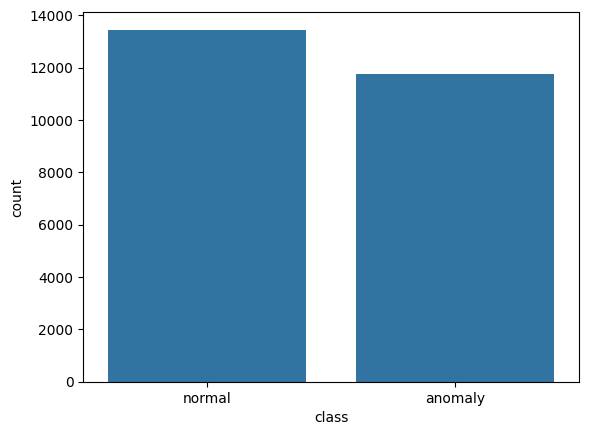

In [16]:
sns.countplot(x = train['class'])

In [17]:
print(train['class'].value_counts())

class
normal     13449
anomaly    11743
Name: count, dtype: int64


In [18]:
def le (df):
    for col in df.columns:
        if df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [19]:
train.drop(['num_outbound_cmds'], axis = 1, inplace= True)
test.drop(['num_outbound_cmds'], axis = 1, inplace= True)

In [20]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [21]:
X_train = train.drop(['class'], axis = 1)
Y_train = train['class']

In [22]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select = 10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i == True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate']

In [23]:
X_train = X_train[selected_features]

In [24]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size= 0.7, random_state=2)

In [26]:
x_train.shape

(17634, 10)

In [27]:
x_test.shape

(7558, 10)

In [28]:
y_train.shape

(17634,)

In [29]:
y_test.shape

(7558,)

In [30]:
import time

In [31]:
from sklearn.linear_model import LogisticRegression

clfl = LogisticRegression(max_iter= 1200000)
start_time = time.time()
clfl.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time - start_time )

Training time:  0.15491676330566406


In [32]:
start_time = time.time()
y_test_pred = clfl.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time - start_time)

Testing time:  0.0058557987213134766


In [33]:
lg_model = LogisticRegression(random_state= 42)
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [34]:
lg_train, lg_test = lg_model.score(x_train, y_train), lg_model.score(x_test, y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.9288873766587274
Test Score: 0.9233924318602805


In [35]:
#pip install optuna

In [36]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [37]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log = False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [38]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1)
print(study_KNN.best_trial)

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.9797565493516803], datetime_start=datetime.datetime(2024, 1, 31, 9, 23, 54, 345527), datetime_complete=datetime.datetime(2024, 1, 31, 9, 23, 56, 559869), params={'KNN_n_neighbors': 15}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [39]:
KNN_model = KNeighborsClassifier(n_neighbors= study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Train Score: 0.9807190654417602
Test Score: 0.9797565493516803


In [40]:
from sklearn.tree import DecisionTreeClassifier

clfd = DecisionTreeClassifier(criterion="entropy", max_depth=4)
start_time = time.time()
clfd.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time - start_time)


Training time:  0.03869342803955078


In [41]:
start_time = time.time()
y_test_pred = clfd.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time - start_time)

Testing time:  0.007583141326904297


In [42]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 32, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_test, y_test)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [43]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials= 30)
print(study_dt.best_trial)

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[1.0], datetime_start=datetime.datetime(2024, 1, 31, 9, 24, 1, 961634), datetime_complete=datetime.datetime(2024, 1, 31, 9, 24, 1, 989229), params={'dt_max_depth': 19, 'dt_max_features': 32}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=32, log=False, low=2, step=1)}, trial_id=0, value=None)


In [44]:
dt = DecisionTreeClassifier(max_features=study_dt.best_trial.params['dt_max_features'], max_depth=study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)  # Use y_train instead of y_test for the labels

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")


Train Score: 1.0
Test Score: 0.9948399047367028


In [45]:
data = [
    ["KNN", KNN_train, KNN_test],
    ["LogisticRegression", lg_train, lg_test],
    ["DecisionTree", dt_train, dt_test]
]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒════════════════════╤═══════════════╤══════════════╕
│ Model              │   Train Score │   Test Score │
╞════════════════════╪═══════════════╪══════════════╡
│ KNN                │      0.980719 │     0.979757 │
├────────────────────┼───────────────┼──────────────┤
│ LogisticRegression │      0.928887 │     0.923392 │
├────────────────────┼───────────────┼──────────────┤
│ DecisionTree       │      1        │     0.99484  │
╘════════════════════╧═══════════════╧══════════════╛


In [46]:
SEED = 43

#Decision Tree Model
dtc = DecisionTreeClassifier()

#KNN
knn = KNeighborsClassifier()

#LOGISTIC REGRESSION MODEL
lr = LogisticRegression()

In [47]:
from sklearn.model_selection import cross_val_score
models = {}
models['KNeighborsClassifier'] = knn
models['LogisticRegression'] = lr
models['DecisionTreeClassifier'] = dtc

In [48]:
scores = {}
for name in models:
    scores[name] = {}
    for scorer in ['precision', 'recall']:
        scores[name][scorer] = cross_val_score(models[name], x_train, y_train, cv=10, scoring=scorer)

In [50]:
def line(name):
    return '*'*(25 - len(name)//2)

for name in models:
    print(line(name), name, 'Model Validation', line(name))

    for scorer in ['precision', 'recall']:
        mean = round(np.mean(scores[name][scorer])*100, 2)
        stdev = round(np.std(scores[name][scorer])*100, 2)
        print ("Mean {}:".format(scorer),"/n", mean,"%", "+-", stdev)
        print()

*************** KNeighborsClassifier Model Validation ***************
Mean precision: /n 98.45 % +- 0.48

Mean recall: /n 98.24 % +- 0.54

**************** LogisticRegression Model Validation ****************
Mean precision: /n 91.36 % +- 0.56

Mean recall: /n 95.72 % +- 0.69

************** DecisionTreeClassifier Model Validation **************
Mean precision: /n 99.53 % +- 0.24

Mean recall: /n 99.48 % +- 0.15



/tmp/ipykernel_4425/4229840598.py:4: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  scores = pd.DataFrame(scores).swapaxes("index", "columns") * 100


<Axes: >

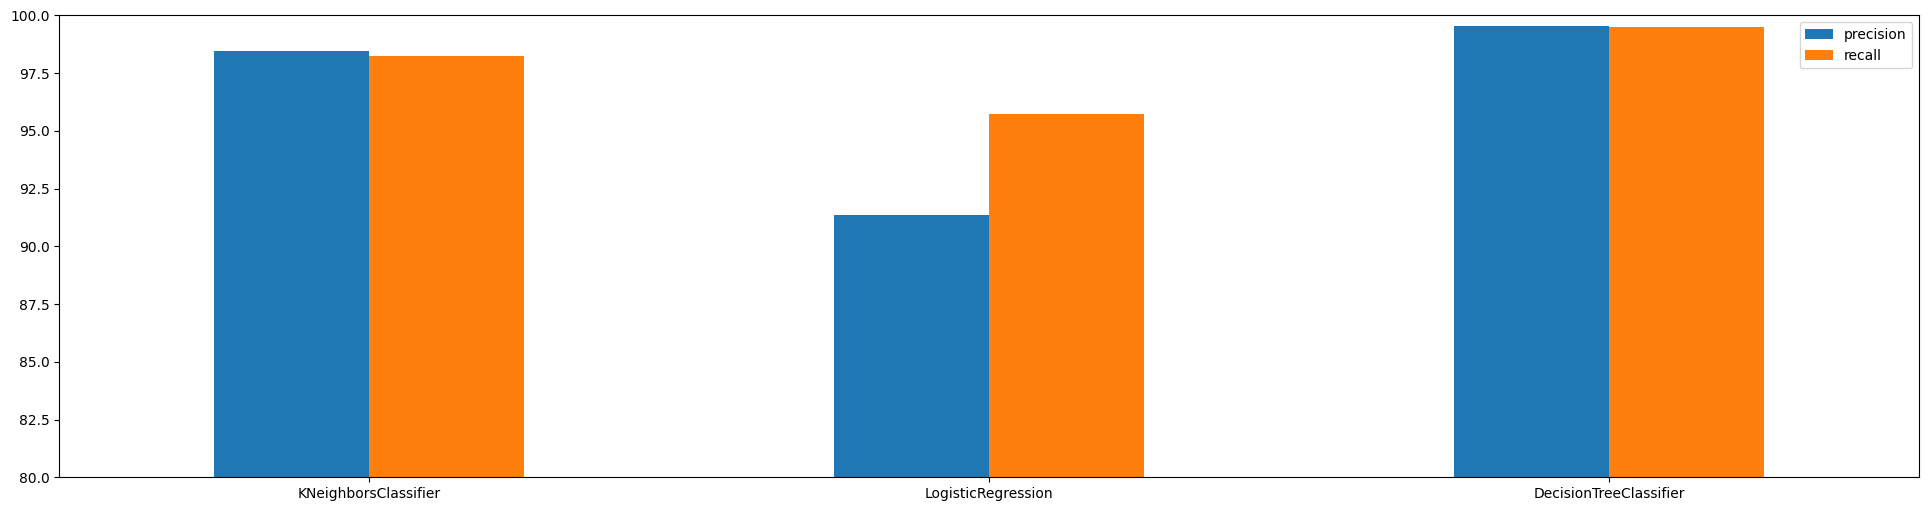

In [51]:
for name in models:
    for scorer in ['precision', 'recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores = pd.DataFrame(scores).swapaxes("index", "columns") * 100
scores.plot(kind="bar", ylim=[80, 100], figsize=(24,6), rot= 0)